# CSE151A - PA1
By: Jonathan Lo<br>
Date: 7/9/23

## Overhead

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Dataset loading
wine_raw = np.loadtxt('wine/wine.data', delimiter=",")
wine_labels = wine_raw[:, 0]
wine_features = wine_raw[:, 1:]

mystery_raw = np.loadtxt('mystery.dat', delimiter=",")
mystery_labels = mystery_raw[:, -1]
mystery_features = mystery_raw[:, :-1]

## Questions

### Q1a

In [3]:
def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def one_nn(test_point, dataset):
    distances = np.zeros(len(dataset))
    
    for i, data_point in enumerate(dataset):
        distances[i] = euclidean_distance(test_point, data_point[1:])
    
    wine_label = np.argmin(distances)
    return dataset[wine_label, 0]

### Q1b

In [4]:
# Initialize the confusion matrix
N = np.zeros((3, 3))

# Perform LOOCV
for i in range(len(wine_raw)):
    # Define the test point
    test_point = wine_features[i]
    true_label = wine_labels[i]

    # Create the training set by excluding the test point
    train_data = np.delete(wine_raw, i, axis=0)

    # Classify the test point using 1-NN algorithm
    predicted_label = one_nn(test_point, train_data)

    # Update the confusion matrix
    N[int(true_label) - 1, int(predicted_label) - 1] += 1

# Calculate accuracy
accuracy = np.sum(np.diagonal(N)) / len(wine_raw)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(N)

Accuracy: 0.7696629213483146
Confusion Matrix:
[[52.  3.  4.]
 [ 5. 54. 12.]
 [ 3. 14. 31.]]


### Q1c

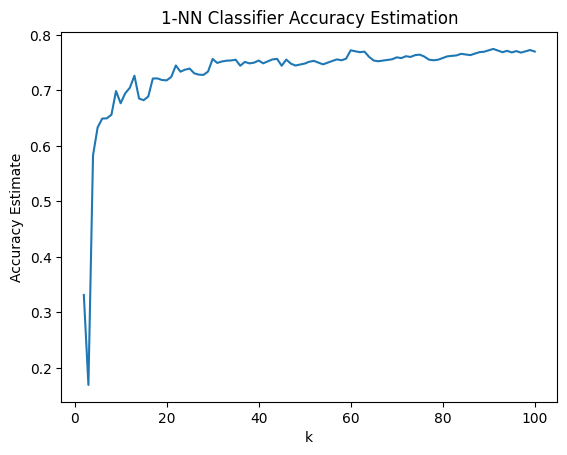

In [5]:
k_values = range(2, 101)  
accuracy_estimates = []

# Perform k-fold cross-validation
for k in k_values:
    accuracies = []

    # Split data into k folds
    folds = np.array_split(wine_raw, k)

    # Iterate over each fold as test set
    for i in range(k):
        # Define test set and train set
        test_data = folds[i]
        train_data = np.concatenate([fold for j, fold in enumerate(folds) if j != i])

        # Initialize confusion matrix
        N = np.zeros((3, 3))

        # Classify each test point and update confusion matrix
        for j in range(len(test_data)):
            test_point = test_data[j, 1:]
            true_label = int(test_data[j, 0])
            predicted_label = one_nn(test_point, train_data)
            N[int(true_label) - 1, int(predicted_label) - 1] += 1

        # Calculate accuracy for the fold
        accuracy = np.sum(np.diagonal(N)) / len(test_data)
        accuracies.append(accuracy)

    # Calculate average accuracy across all folds for the current k
    avg_accuracy = np.mean(accuracies)
    accuracy_estimates.append(avg_accuracy)

# Plot the accuracy estimates
plt.plot(k_values, accuracy_estimates)
plt.xlabel('k')
plt.ylabel('Accuracy Estimate')
plt.title('1-NN Classifier Accuracy Estimation')
plt.show()

### Q1d

In [6]:
# Normalize the features
min_vals = np.min(wine_raw[:, 1:], axis=0)
max_vals = np.max(wine_raw[:, 1:], axis=0)
normalized_data = (wine_raw[:, 1:] - min_vals) / (max_vals - min_vals)

# Combine the normalized features with the labels
normalized_data = np.column_stack((wine_raw[:, 0], normalized_data))

# Perform LOOCV with the normalized data
N = np.zeros((3, 3))

for i in range(len(normalized_data)):
    test_point = normalized_data[i, 1:]
    true_label = int(normalized_data[i, 0])
    train_data = np.delete(normalized_data, i, axis=0)

    predicted_label = one_nn(test_point, train_data)
    N[int(true_label) - 1, int(predicted_label) - 1] += 1

# Calculate accuracy
accuracy = np.sum(np.diagonal(N)) / len(normalized_data)

# Print confusion matrix and accuracy
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(N)

Accuracy: 0.949438202247191
Confusion Matrix:
[[59.  0.  0.]
 [ 5. 62.  4.]
 [ 0.  0. 48.]]


### Q2a

By fitting a linear regression model to the dataset, I can find features with the largest absolute coefficients to see which have the largest impact on the output, `y`.

### Q2b

In [7]:
# Init model
model = LinearRegression()
model.fit(mystery_features, mystery_labels)

# Get top 10 features
feature_coefficients = np.abs(model.coef_)
sorted_indices = np.argsort(feature_coefficients)[::-1]
selected_features = sorted_indices[:10]

# Print the indices of the selected features
print("Top 10 Features:", selected_features)

Top 10 Features: [57 26 10 20 67  1 23 43 33 70]
